Before Start, remember to check the path of dataset and location of utils.py

In [ ]:
import importlib
import utils
import scanpy as sc
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
import numpy as np
import pandas as pd
from sklearn.metrics import precision_recall_curve, auc
import phate

import warnings
warnings.filterwarnings("ignore")
importlib.reload(utils)


from utils import Gaussian_Mixture_Representation
from utils import Extract_Info
from utils import calculate_qot
from utils import visualize_and_evaluate
from utils import normalize_matrix
from utils import perform_analysis_phate_and_calculate_aucpr

Reading Annotated data

In [27]:
file_path = 'QOT/Dataset/PDAC.h5ad'
adata=sc.read_h5ad(file_path)

Extract Dataframe from Annotated Data

In [28]:
Extract_Info(adata,  gene_matrix= 'X_pca', type_cell = 'cell_types',id= 'sampleID', progession='status',dataset_type='rna')

Obtain the Gaussian Mixture Representation of the Gene Matrix

In [29]:
Gaussian_Mixture_Representation(adata, num_components=1, random_state=2, min_samples_for_gmm=16)

Generate the sample level distance matrix by QOT method

In [30]:
calculate_qot(adata, method = "alternative")
print("QOT Complete")

Calculating GW2 distance 1/595: T1 to T2
Calculating GW2 distance 2/595: T1 to T3
Calculating GW2 distance 3/595: T1 to T4
Calculating GW2 distance 4/595: T1 to T5
Calculating GW2 distance 5/595: T1 to T6
Calculating GW2 distance 6/595: T1 to T7
Calculating GW2 distance 7/595: T1 to T8
Calculating GW2 distance 8/595: T1 to T9
Calculating GW2 distance 9/595: T1 to T10
Calculating GW2 distance 10/595: T1 to T11
Calculating GW2 distance 11/595: T1 to T12
Calculating GW2 distance 12/595: T1 to T13
Calculating GW2 distance 13/595: T1 to T14
Calculating GW2 distance 14/595: T1 to T15
Calculating GW2 distance 15/595: T1 to T16
Calculating GW2 distance 16/595: T1 to T17
Calculating GW2 distance 17/595: T1 to T18
Calculating GW2 distance 18/595: T1 to T19
Calculating GW2 distance 19/595: T1 to T20
Calculating GW2 distance 20/595: T1 to T21
Calculating GW2 distance 21/595: T1 to T22
Calculating GW2 distance 22/595: T1 to T23
Calculating GW2 distance 23/595: T1 to T24
Calculating GW2 distance 24/

Evaluation of the Distance Matrix Based on Silhoutte Score; Silhoutte Score (PILOT version); ARI (Adjusted Rand Index)

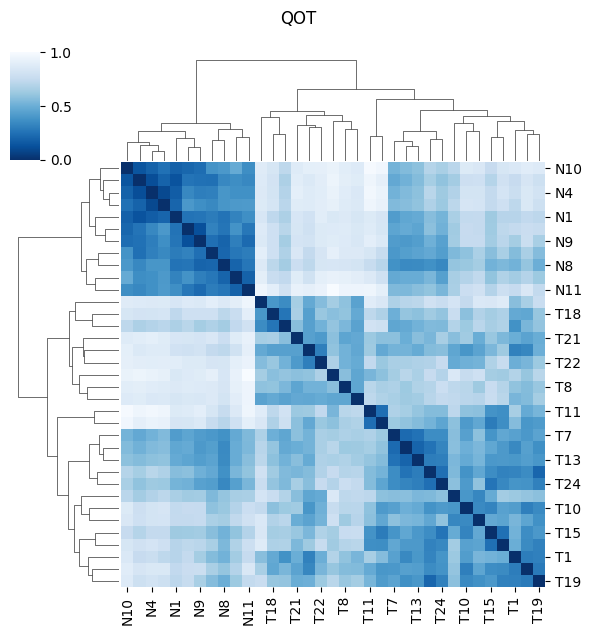

Silhouette Score: 0.35938744926208477
Silhouette Score (PILOT Version): 0.7146459970273847


In [31]:
visualize_and_evaluate(adata)

Downstream Analysis: Trajectory Estimation using PHATE

Calculating PHATE...
  Running PHATE on precomputed distance matrix with 35 observations.
  Calculating graph and diffusion operator...
    Calculating affinities...
  Calculating optimal t...
    Automatically selected t = 17
  Calculating diffusion potential...
  Calculating metric MDS...
Calculated PHATE in 0.03 seconds.


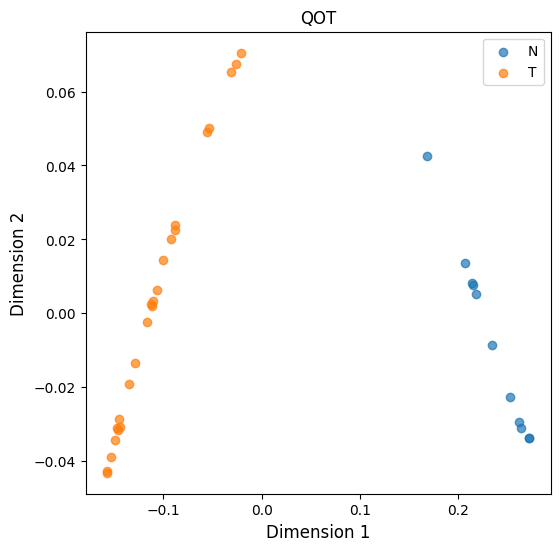

AUCPR: 1.0


In [41]:
perform_analysis_phate_and_calculate_aucpr(adata,dataset_name = 'PDAC')